In [17]:
import tensorflow as tf
import json
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = [
             'I love my dog',
             'I love my cat',
             'You love my dog!',
             'Do you think my dog is amazing?'
]
### {'<PAD>': 0, 'i': 1, 'love': 2, 'my': 3, 'dog': 4, 'cat': 5, 'you': 6}

#Padding is a way to make all the sentences same length in terms of words (reseved as 0 for the word)
tokenizer = Tokenizer(num_words = 100, oov_token = "<OOV>")
#   # num_words: Maximum number of words to keep. Keeps the most frequent words
#   # oov_token: The out of vocabulary token

# Go through all of the text and fit itself
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

sequences = tokenizer.texts_to_sequences(sentences)
padded_sequences = pad_sequences(sequences, padding = 'post', truncating = 'post', maxlen = 5)
#   #padding = 'post': means to add padding at the end. Default is 'pre', which adds to padding at the front.
#   #maxlen = 5; Only allow sentences to be of length '5' in this instance
#   #truncating = 'post': cut off at the end
print(padded_sequences)

test_data = [
             'I really love my dog',
             'My dog loves my rhino'
]

test_seq = tokenizer.texts_to_sequences(test_data)
print('============================')
print(test_seq)

{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[5 3 2 4 0]
 [5 3 2 7 0]
 [6 3 2 4 0]
 [8 6 9 2 4]]
[[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]


In [15]:
!wget --no-check-certificate\
  storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
  -O /tmp/sarcasm.json

--2020-07-06 16:15:20--  http://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 64.233.189.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2020-07-06 16:15:20 (210 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [21]:
#Define parameters
vocab_size = 10000
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

#NN Parameters
embedding_dim = 16
training_size = 20000

In [39]:
with open("/tmp/sarcasm.json", 'r') as f:
  datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

# training and testing needed
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

tokenizer = Tokenizer(num_words = vocab_size, oov_token = cov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding = padding_type, truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)


In [40]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [50]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24, activation = 'relu'),
                             tf.keras.layers.Dense(1, activation = "sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [51]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [52]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 2s - loss: 0.6614 - accuracy: 0.5940 - val_loss: 0.5629 - val_accuracy: 0.7259
Epoch 2/30
625/625 - 2s - loss: 0.4183 - accuracy: 0.8371 - val_loss: 0.3811 - val_accuracy: 0.8350
Epoch 3/30
625/625 - 2s - loss: 0.3025 - accuracy: 0.8791 - val_loss: 0.3483 - val_accuracy: 0.8532
Epoch 4/30
625/625 - 2s - loss: 0.2521 - accuracy: 0.9009 - val_loss: 0.3399 - val_accuracy: 0.8568
Epoch 5/30
625/625 - 2s - loss: 0.2162 - accuracy: 0.9157 - val_loss: 0.3532 - val_accuracy: 0.8475
Epoch 6/30
625/625 - 2s - loss: 0.1895 - accuracy: 0.9276 - val_loss: 0.3601 - val_accuracy: 0.8511
Epoch 7/30
625/625 - 2s - loss: 0.1686 - accuracy: 0.9367 - val_loss: 0.3659 - val_accuracy: 0.8548
Epoch 8/30
625/625 - 2s - loss: 0.1489 - accuracy: 0.9441 - val_loss: 0.3852 - val_accuracy: 0.8545
Epoch 9/30
625/625 - 2s - loss: 0.1355 - accuracy: 0.9505 - val_loss: 0.4055 - val_accuracy: 0.8527
Epoch 10/30
625/625 - 2s - loss: 0.1209 - accuracy: 0.9581 - val_loss: 0.4430 - val_accuracy: 0.8392

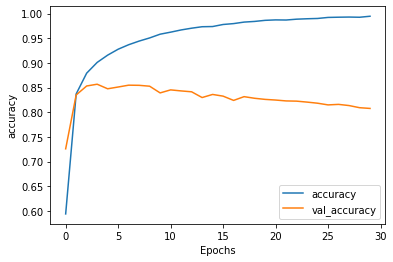

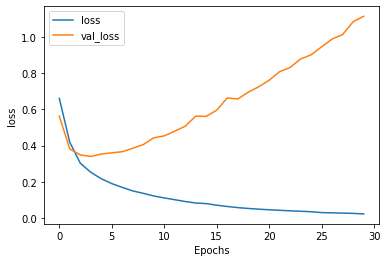

In [55]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")


In [56]:
# Classify new sentiment on new sentences
sentence = [
            "Florida man doesn't get straw, attacks McDonald's Employee",
            "Omeed is totally a good teacher and not terrible",
            "Clint, slaves over reinforcement model, dies"
]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))


[[0.39430806]
 [0.00112233]
 [0.9988337 ]]
